Features shape: (178, 13)
Labels shape: (178,)
GradientBoostingClassifier() test_size:0.2
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       0.93      0.93      0.93        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

LogisticRegression() test_size:0.2
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

GradientBoostingClassifier() test_size:0.3
              precision    recall  f1-score   support

     class_0   

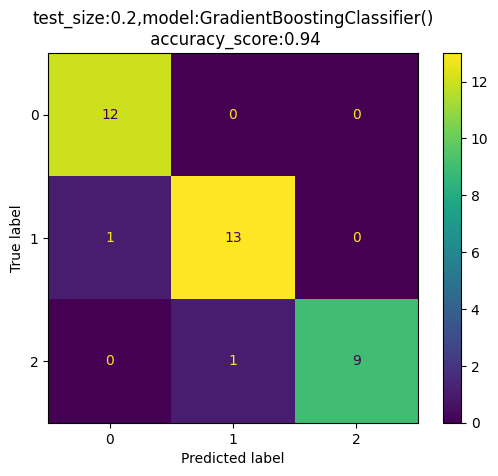

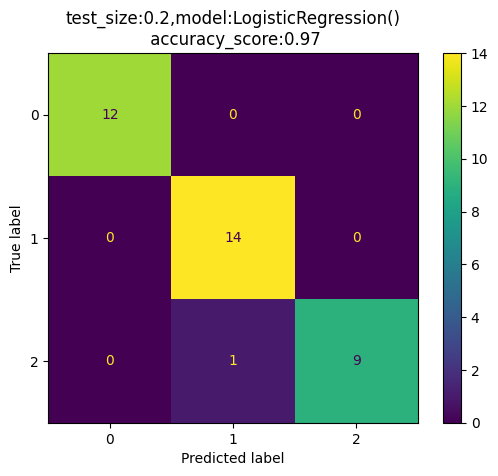

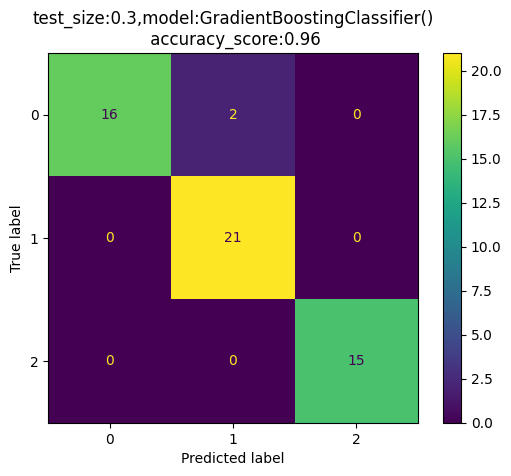

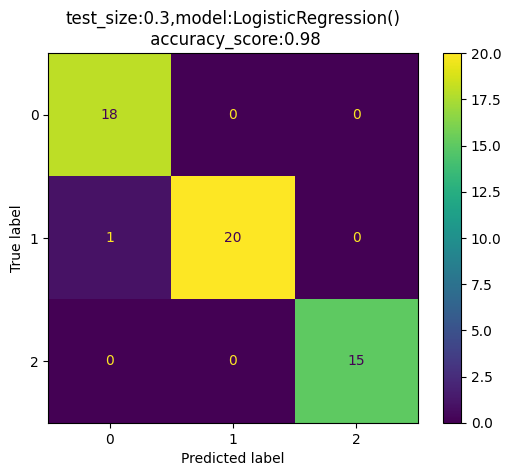

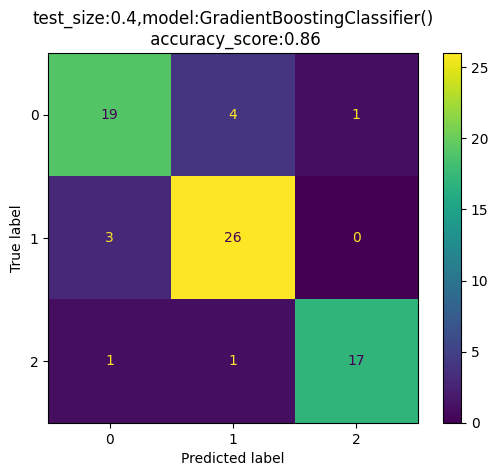

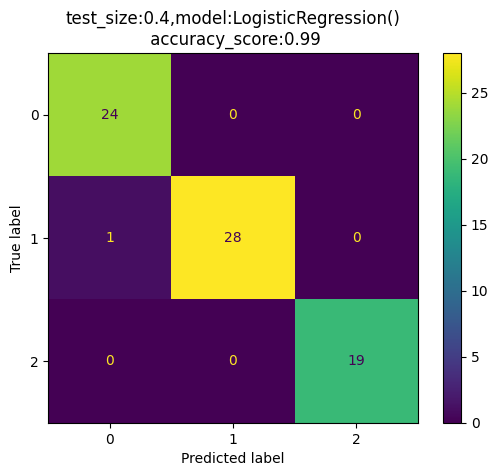

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, ConfusionMatrixDisplay, accuracy_score)

wine = datasets.load_wine()
X,y = wine.data, wine.target
print('Features shape:', X.shape)
print('Labels shape:', y.shape)

test_size=[0.2,0.3,0.4]
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42, stratify=y)
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model_names = {"gradientboosting": GradientBoostingClassifier(), "logisticregression": LogisticRegression()}
    for name, model in model_names.items():
     print(model,f"test_size:{i}")
     model.fit(X_train, y_train)
     y_pred = model.predict(X_test)
     print(classification_report(y_test, y_pred, target_names=['class_0', 'class_1', 'class_2']))
     ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
     plt.title(f"test_size:{i},model:{model}\n accuracy_score:{accuracy_score(y_test, y_pred):.2f}") 
    
     

